<a href="https://colab.research.google.com/github/LillWawrence/consulting_skills_exam/blob/mollybranch/mollyconsulting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
articles = pd.read_csv('articles.B2M.csv')
authors = pd.read_csv('authors.B2M.csv')
papercounts = pd.read_csv('paper_counts.csv')
display(articles)


,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10575721,[Computer-assisted preoperative planning of kn...,The general configuration of replaced knee is ...,0035-1040,Revue de chirurgie orthopedique et reparatrice...,(85) 591-600,1999,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10617805,[Urogenital amyloidosis: clinico-pathological ...,Amyloidosis of the genito-urinary tract is unc...,0242-6498,Annales de pathologie,(19) 487-91,1999,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
2,10656443,Serum beta-2 microglobulin levels are a signif...,Our objective was to investigate the prognosti...,1078-0432,Clinical cancer research : an official journal...,(6) 147-52,2000,J,Rodriguez,J,"Department of Leukemia, University of Texas M...."
3,10790290,Exposure of Daudi cells to low-frequency magne...,The effect of extremely low-frequency electrom...,0033-7587,Radiation research,(153) 663-9,2000,C A,Morehouse,CA,FDA Center for Devices and Radiological Health...
4,10793017,Effects of dialyzer reuse on the permeability ...,Little attention has been given to the effects...,1523-6838,American journal of kidney diseases : the offi...,(35) 839-44,2000,J P,Matos,JP,"Department of Internal Medicine, Division of N..."
...,...,...,...,...,...,...,...,...,...,...,...
660,37889281,Artificial intelligence in early detection and...,Acute kidney injury (AKI) has a significant im...,1432-198X,"Pediatric nephrology (Berlin, Germany)",10.1007/s00467-023-06191-7,2023,Rupesh,Raina,R,Akron Nephrology Associates/Cleveland Clinic A...
661,37972698,Screening the optimal housekeeping genes (HKGs...,Selection of stable housekeeping genes (HKGs) ...,1879-0038,Gene,(895) 147966,2023,Nanjian,Luo,N,"School of Preclinical Medicine, Zunyi Medical ..."
662,38048169,Proteomics Analysis of Serum Reveals Potential...,"Heart failure (HF), a complex clinical syndrom...",1535-3907,Journal of proteome research,10.1021/acs.jproteome.3c00537,2023,Taohua,Lan,T,State Key Laboratory of Dampness Syndrome of C...
663,38053293,Highly efficient genome editing via CRISPR-Cas...,The CRISPR-Cas9 system has significantly advan...,1976-670X,BMB reports,5981,2023,A Reum,Han,AR,NaN


In [ ]:
newarticles = articles[articles['Year'].isin([2020,2021,2022, 2023])]
#display(newarticles)

publicationauthors = newarticles[['FirstAuthorLastname', 'FirstAuthorInitials']].value_counts(ascending=False)

# Filter publicationauthors to show only those with counts greater than 2
authors_with_multiple_pubs = publicationauthors[publicationauthors > 1]
display(authors_with_multiple_pubs)


,,count
FirstAuthorLastname,FirstAuthorInitials,
Thongsin,N,3
Wang,X,3
Agrawal,S,2
Iversen,E,2
Gorji-Bahri,G,2
Rasmussen,M,2
Jiang,S,2
Hu,X,2
Wang,GH,2


In [3]:
authors.info()
#4 initials,1 forename 1375 affliation missing
articles.info()
#same number missing



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PMID               5797 non-null   int64 
 1   AuthorN            5797 non-null   int64 
 2   AuthorForename     5796 non-null   object
 3   AuthorLastname     5797 non-null   object
 4   AuthorInitials     5793 non-null   object
 5   AuthorAffiliation  4422 non-null   object
dtypes: int64(2), object(4)
memory usage: 271.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PMID                    665 non-null    int64 
 1   Title                   665 non-null    object
 2   Abstract                665 non-null    object
 3   ISSN                    665 non-null    object
 4   Journal                 665 non-null    obje

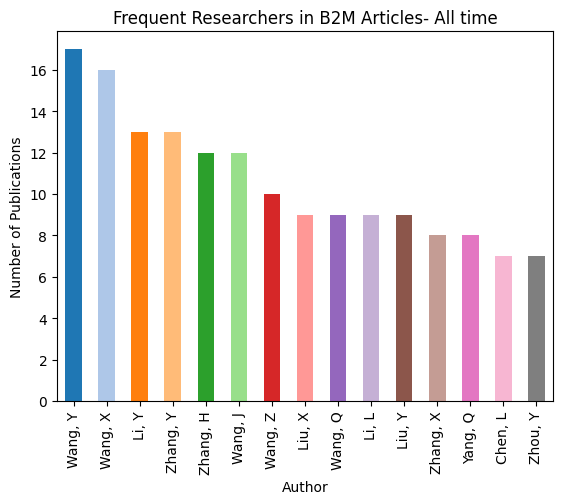

In [12]:
authors['FullName'] = authors['AuthorLastname'] + ', ' + authors['AuthorInitials']
author_count = authors['FullName'].value_counts()

#top researchers - considering all time first

author_count.head(15)

#plotting this

import matplotlib.pyplot as plt
barplotauthor=author_count.head(15).plot(kind='bar', color=plt.cm.tab20(range(15)))
plt.title('Frequent Researchers in B2M Articles- All time')
plt.xlabel('Author')
plt.ylabel('Number of Publications')
plt.show()


In [19]:
#narrowing this down to more recent publications - we have set this as research after 2020

recentarticles=articles[articles['Year']>=2020]
#display(recentarticles)
#213 articles

recentauthors=authors[authors['PMID'].isin(recentarticles['PMID'])]
#display(recentauthors)
#2246

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
3239,30862937,1,H,Le-Niculescu,H,"Department of Psychiatry, Indiana University S...","Le-Niculescu, H"
3240,30862937,2,K,Roseberry,K,"Department of Psychiatry, Indiana University S...","Roseberry, K"
3241,30862937,3,D F,Levey,DF,"Department of Psychiatry, Indiana University S...","Levey, DF"
3242,30862937,4,J,Rogers,J,"Department of Psychiatry, Indiana University S...","Rogers, J"
3243,30862937,5,K,Kosary,K,"Department of Psychiatry, Indiana University S...","Kosary, K"
...,...,...,...,...,...,...,...
5792,38092161,6,Rekha,Sharma,R,ICAR-National Bureau of Animal Genetic Resourc...,"Sharma, R"
5793,38092161,7,Upasna,Sharma,U,ICAR-National Bureau of Animal Genetic Resourc...,"Sharma, U"
5794,38092161,8,Pooja,Chhabra,P,ICAR-National Bureau of Animal Genetic Resourc...,"Chhabra, P"
5795,38092161,9,M A,Mir,MA,Shere Kashmir University of Agricultural Scien...,"Mir, MA"


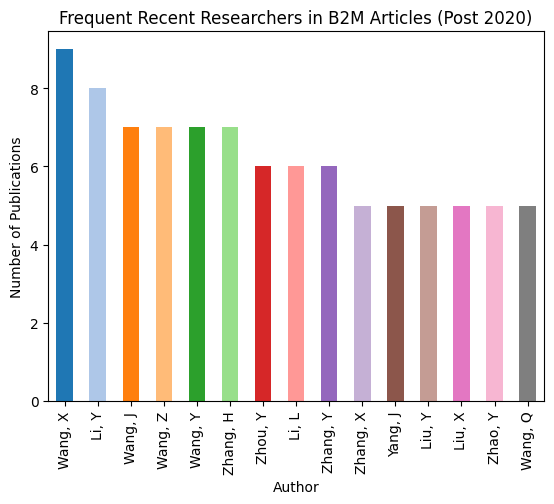

In [22]:
#frequent and recent - combination
recentauthors_count=recentauthors['FullName'].value_counts()
recentauthors_count.head(15)
import matplotlib.pyplot as plt
barplotrecentauthor=recentauthors_count.head(15).plot(kind='bar', color=plt.cm.tab20(range(15)))
plt.title('Frequent Recent Researchers in B2M Articles (Post 2020)')
plt.xlabel('Author')
plt.ylabel('Number of Publications')
plt.show()